<a href="https://colab.research.google.com/github/RoseMwangi98/Football_prediction_regression/blob/main/ROSE_MWANGI_FOOTBALL_PREDICTION_REGRESSION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**QUESTIONS**

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team Rank of away team Tournament type Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [ ]:
#import the libraries needed.
#import the library needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load and preview the dataset
rank=pd.read_csv("fifa_ranking.csv")
rank.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
rank.shape

(57793, 16)

In [ ]:
rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
#load the second dataset
results=pd.read_csv("results.csv")
results.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False


In [ ]:
results.shape

(40839, 9)

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

**TIDYING UP OUR DATASET AND CLEANING THE DATASET**

In [ ]:
results.tournament.unique().sum()

"FriendlyBritish ChampionshipCopa LiptonCopa NewtonCopa Premio Honor ArgentinoCopa Premio Honor UruguayoCopa RocaCopa AméricaCopa Chevallier BoutellNordic ChampionshipInternational CupBaltic CupBalkan CupFIFA World CupCopa Rio BrancoFIFA World Cup qualificationCCCF ChampionshipNAFU ChampionshipCopa Oswaldo CruzPan American ChampionshipCopa del PacíficoCopa Bernardo O'HigginsAFC Asian Cup qualificationAtlantic CupAFC Asian CupAfrican Cup of NationsCopa Paz del ChacoMerdeka TournamentUEFA Euro qualificationUEFA EuroWindward Islands TournamentAfrican Cup of Nations qualificationVietnam Independence CupCopa Carlos DittbornCONCACAF ChampionshipCopa Juan Pinto DuránUAFA CupSouth Pacific GamesCONCACAF Championship qualificationCopa ArtigasGaNEFoKing's CupGulf CupIndonesia TournamentKorea CupBrazil Independence CupCopa Ramón CastillaOceania Nations CupCECAFA CupCopa Félix BogadoKirin CupCFU Caribbean Cup qualificationCFU Caribbean CupAmílcar Cabral CupMundialitoWest African CupNehru CupMerlion

In [ ]:
rank.rename(columns={'rank_date':'date',
                     'country_full':'country'
                     },inplace=True)

**DATA MERGEING**

In [ ]:
rank.rename(columns={'rank_date':'date',
                     'country_full':'country'
                     },inplace=True)

In [ ]:
# converted the date columns into datetime so that they can be split
results.date = pd.to_datetime(results['date'])#,format='YYYY-mm-dd')
rank.date = pd.to_datetime(rank['date'])#,format='YYYY-mm-dd')

In [ ]:
results['year'] = results['date'].dt.year
results['month'] = results['date'].dt.month
results['day']= results['date'].dt.day

In [ ]:
rank['year'] = rank['date'].dt.year
rank['month'] = rank['date'].dt.month
rank['day']= rank['date'].dt.day

In [ ]:
#merging the two dataset on the year and month column 
df = results.merge(rank,how='inner',left_on=['year','month','home_team'],right_on=['year','month','country'])
df.head(3)


,date_x,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,year,month,day_x,rank,country_y,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y,day_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,15,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,29,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8


In [ ]:
df1 = results.merge(rank,how='inner',left_on=['year','month','away_team'],right_on=['year','month','country'])
df1
df2=df1[df1['day_x']<df1['day_y']]
df2.head(5)

,date_x,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,year,month,day_x,rank,country_y,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y,day_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8
2,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,1,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8
5,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,8,1,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8
8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,8,1,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8
10,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,8,7,25,Zambia,ZAM,0.0,38,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,8


In [ ]:
rank1 = df2[['away_team','rank','rank_change','total_points','date_x']]
rank1.head(3)

,away_team,rank,rank_change,total_points,date_x
0,Paraguay,67,1,0.0,1993-08-01
2,Argentina,5,5,0.0,1993-08-01
5,Ecuador,35,30,0.0,1993-08-01


In [ ]:
results_rank = df.merge(rank1,how='inner',left_on=['date_x','away_team'],right_on=['date_x','away_team'])
results_rank.head(3)

,date_x,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,year,month,day_x,rank_x,country_y,country_abrv,total_points_x,previous_points,rank_change_x,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y,day_y,rank_y,rank_change_y,total_points_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,67,1,0.0
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,1,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,5,5,0.0
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,8,1,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,35,30,0.0


In [ ]:
#drop the columns that are not needed for the analysis
results_rank.drop(['city','country_y','country_abrv','previous_points','day_x','day_y','cur_year_avg','cur_year_avg_weighted',	'last_year_avg','last_year_avg_weighted',	'two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted',	'date_y'],axis=1,inplace=True)

In [ ]:
results_rank.shape

(8200, 17)

In [ ]:
#check for duplicate values
results_rank.duplicated ().sum()

29

In [ ]:
#drop duplicates values
results_rank.drop_duplicates()

,date_x,home_team,away_team,home_score,away_score,tournament,country_x,neutral,year,month,rank_x,total_points_x,rank_change_x,confederation,rank_y,rank_change_y,total_points_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19,0.00,16,CONMEBOL,67,1,0.00
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70,0.00,8,CONMEBOL,5,5,0.00
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,1993,8,22,0.00,-6,CONMEBOL,35,30,0.00
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False,1993,8,94,0.00,31,CONMEBOL,8,-5,0.00
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58,0.00,-7,CAF,25,7,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8195,2018-06-05,Kazakhstan,Azerbaijan,3,0,Friendly,Kazakhstan,False,2018,6,117,272.85,0,UEFA,105,21,321.48
8196,2018-06-05,Lithuania,Latvia,1,1,Friendly,Lithuania,False,2018,6,126,239.38,7,UEFA,129,10,230.04
8197,2018-06-05,Chinese Taipei,New Zealand,0,1,Intercontinental Cup,India,True,2018,6,123,246.74,-2,AFC,120,13,255.78
8198,2018-06-06,Norway,Panama,1,0,Friendly,Norway,False,2018,6,53,595.99,-5,UEFA,55,0,571.17


In [ ]:
results_rank.rename({'rank_x':'home_team_rank',
                'rank_y':'away_team_rank',
                'rank_change_x':'rank_change_home',
                'rank_change_y':'rank_change_away',
                'total_points_y':'total_points_away',
                'total_points_x':'total_points_home'},axis=1,inplace=True)

In [ ]:
def match(score):
    tournament = score[0]
  
  
    if tournament =='FIFA World Cup qualification':
        return 'World Cup'
    elif tournament == 'FIFA World Cup':
        return 'World Cup'
    elif tournament == 'Friendly':
        return 'Friendly'
    else:
        return 'Other'
    return tournament

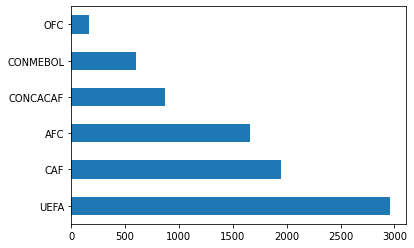

In [ ]:
results_rank.confederation.value_counts().plot.barh()

**Exploratory Data Analysis**

In our EDA we would like to analyze the Types of tournaments and the Goals scored by the Home and the Opposing teams and other variables within the dataset.

Ideally the EDA should be able to help us visualize the chance of a team winning a game depending on whether the Team is playing at Home or Away.

This will in turn help us to determine whether a team has a higher chance of winning losing or drawing in a Game based on the playing field.

Futhermore we would like to study whether playing on Neutral grounds advance a home teams Chance of winning or losing a game

**UNIVARIATE ANALYSIS**

In [ ]:
results_rank.home_team.value_counts()

Mexico                      116
Saudi Arabia                114
Japan                        95
Qatar                        91
France                       89
                           ... 
Gibraltar                     4
Bahamas                       3
Montserrat                    3
Anguilla                      2
Turks and Caicos Islands      2
Name: home_team, Length: 193, dtype: int64

In [ ]:
results_rank.home_team.describe()

count       8200
unique       193
top       Mexico
freq         116
Name: home_team, dtype: object

In [ ]:
results_rank.home_score.describe()

count    8200.000000
mean        1.624512
std         1.606141
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        22.000000
Name: home_score, dtype: float64

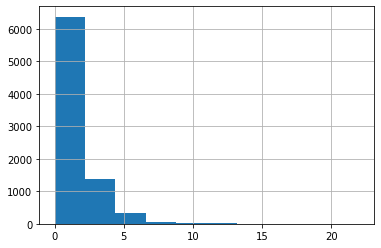

In [ ]:
results_rank.home_score.hist()

In [ ]:
results_rank.away_score.describe()

count    8200.000000
mean        1.078902
std         1.276599
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: away_score, dtype: float64

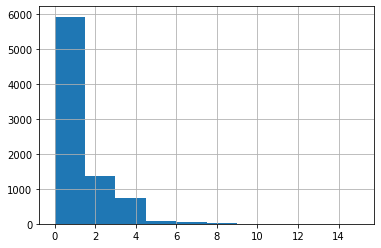

In [ ]:
results_rank.away_score.hist()

In [ ]:
results_rank.describe()

,home_score,away_score,year,month,home_team_rank,total_points_home,rank_change_home,away_team_rank,rank_change_away,total_points_away
count,8200.000000,8200.000000,8200.000000,8200.000000,8200.000000,8200.000000,8200.000000,8200.000000,8200.000000,8200.000000
mean,1.624512,1.078902,2005.416707,7.762927,74.717073,141.126895,1.912439,77.944390,0.847317,136.961863
std,1.606141,1.276599,6.829632,3.235429,50.344591,293.230065,8.082263,51.697046,8.119209,287.885830
min,0.000000,0.000000,1993.000000,1.000000,1.000000,0.000000,-62.000000,1.000000,-52.000000,0.000000
25%,0.000000,0.000000,2000.000000,6.000000,32.000000,0.000000,-2.000000,34.000000,-3.000000,0.000000
50%,1.000000,1.000000,2005.000000,9.000000,69.000000,0.000000,0.000000,72.000000,0.000000,0.000000
75%,2.000000,2.000000,2011.000000,10.000000,110.000000,112.280000,4.000000,115.000000,3.000000,101.940000
max,22.000000,15.000000,2018.000000,12.000000,208.000000,1765.050000,73.000000,208.000000,92.000000,1725.290000


In [ ]:
results_rank.skew()

home_score           1.915225
away_score           2.014584
neutral              1.390356
year                 0.014908
month               -0.674414
home_team_rank       0.471059
total_points_home    2.357907
rank_change_home     1.367425
away_team_rank       0.437583
rank_change_away     1.685723
total_points_away    2.440146
dtype: float64

In [ ]:
results_rank.kurt()

home_score            8.603166
away_score            7.655764
neutral              -0.066926
year                 -1.125793
month                -0.742706
home_team_rank       -0.653662
total_points_home     5.356797
rank_change_home      7.867955
away_team_rank       -0.717786
rank_change_away     13.870805
total_points_away     5.904147
dtype: float64

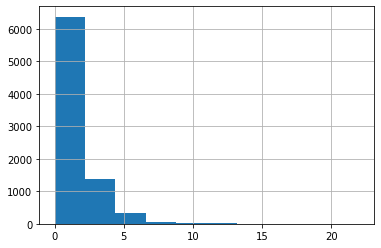

In [ ]:
results_rank.home_score.hist()

**BIVARIATE ANALYSIS**

Text(0, 0.5, 'Games played')

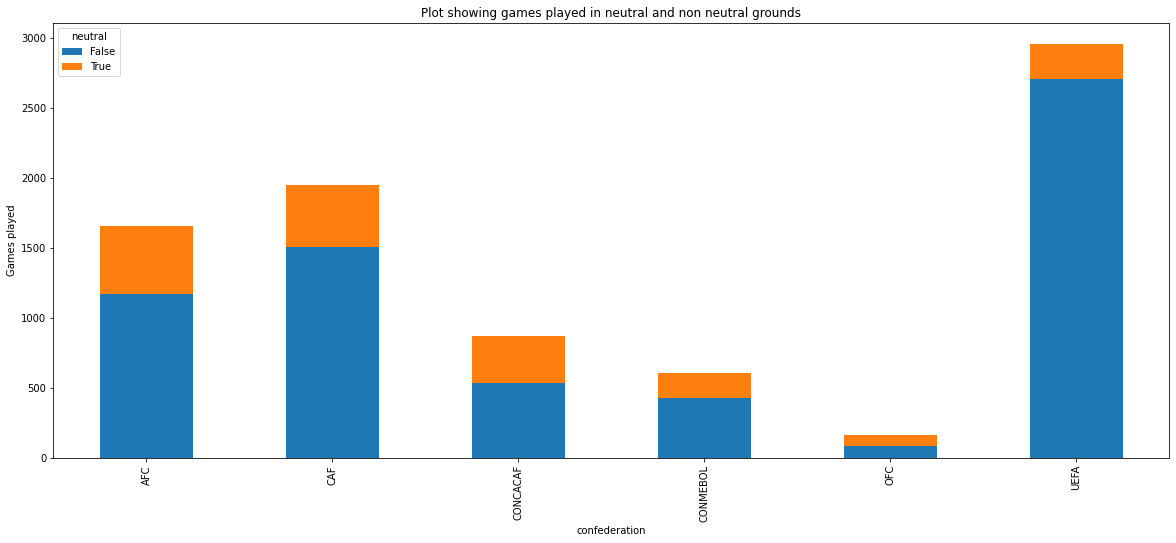

In [ ]:
League = results_rank.groupby(['confederation','neutral'])['confederation'].count().unstack('neutral').sort_values(by='confederation')
ax = League.plot.bar(stacked=True, edgecolor='none',figsize=(20,8))
plt.title('Plot showing games played in neutral and non neutral grounds')
plt.ylabel('Games played')

Text(0, 0.5, 'Goals Scored')

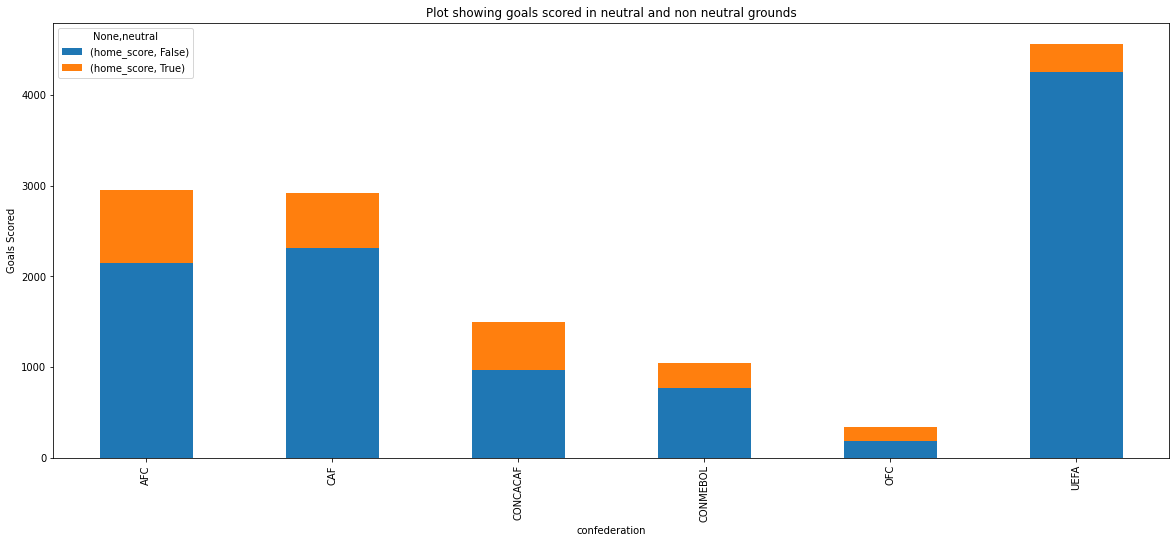

In [ ]:
dataset1 = results_rank[['confederation','neutral','home_score']]
League = dataset1.groupby(['confederation','neutral']).sum('home_score').unstack()
ax = League.plot.bar(stacked=True, edgecolor='none',figsize=(20,8))
plt.title('Plot showing goals scored in neutral and non neutral grounds')
plt.ylabel('Goals Scored')

Text(0, 0.5, 'Goals Scored')

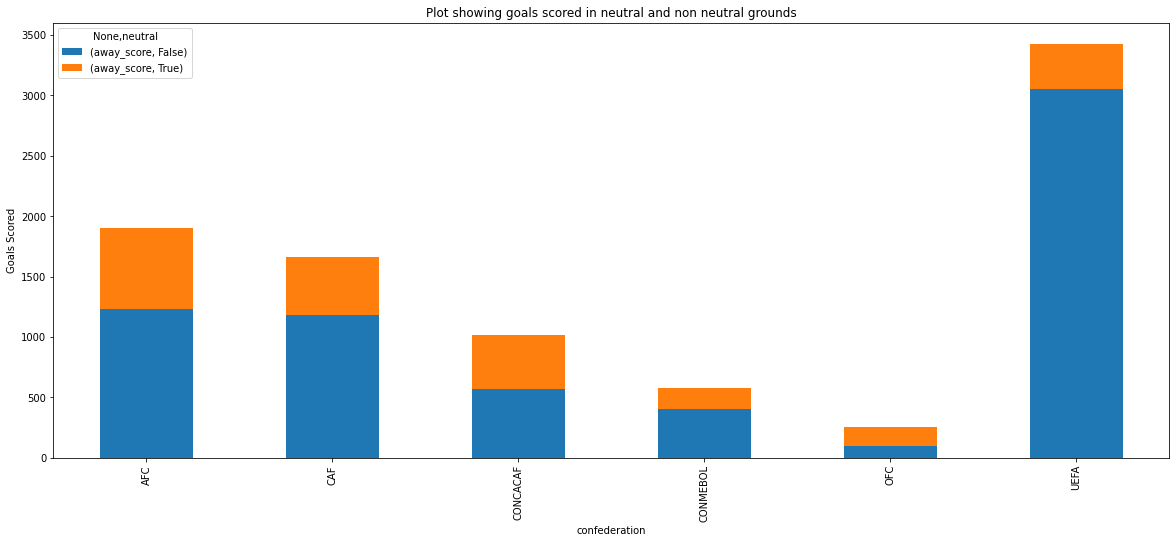

In [ ]:
dataset1 = results_rank[['confederation','neutral','away_score']]
League = dataset1.groupby(['confederation','neutral']).sum('away_score').unstack()
ax = League.plot.bar(stacked=True, edgecolor='none',figsize=(20,8))
plt.title('Plot showing goals scored in neutral and non neutral grounds')
plt.ylabel('Goals Scored')

Text(0, 0.5, 'Goals Scored')

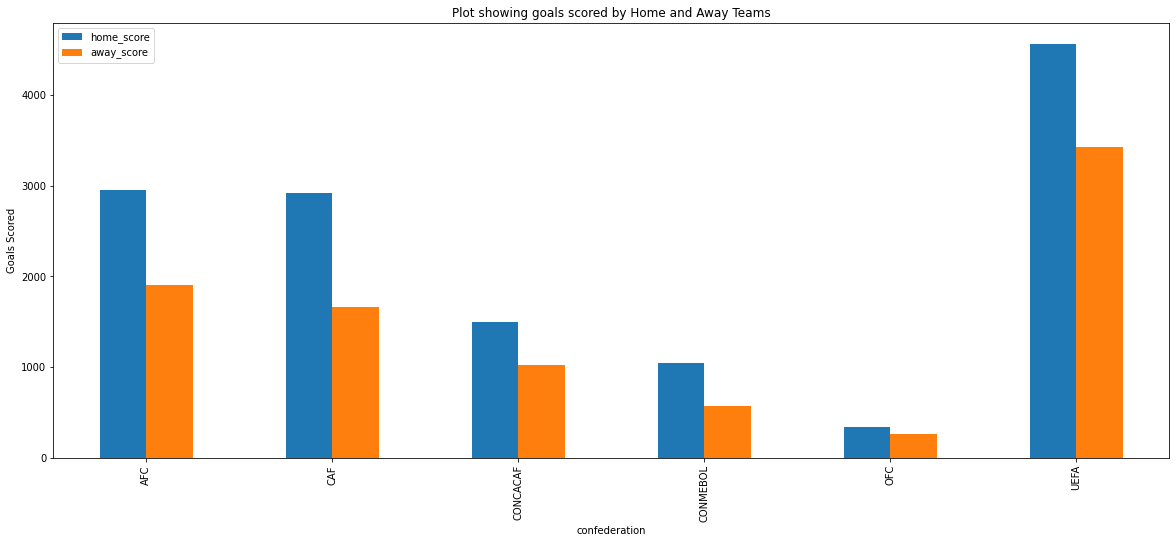

In [ ]:
dataset1 = results_rank[['confederation','home_score','away_score']]
League = dataset1.groupby(['confederation']).sum(['away_score','home_score']).sort_values(by=['confederation'])
ax = League.plot.bar(stacked=False, edgecolor='none',figsize=(20,8))
plt.title('Plot showing goals scored by Home and Away Teams')
plt.ylabel('Goals Scored')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


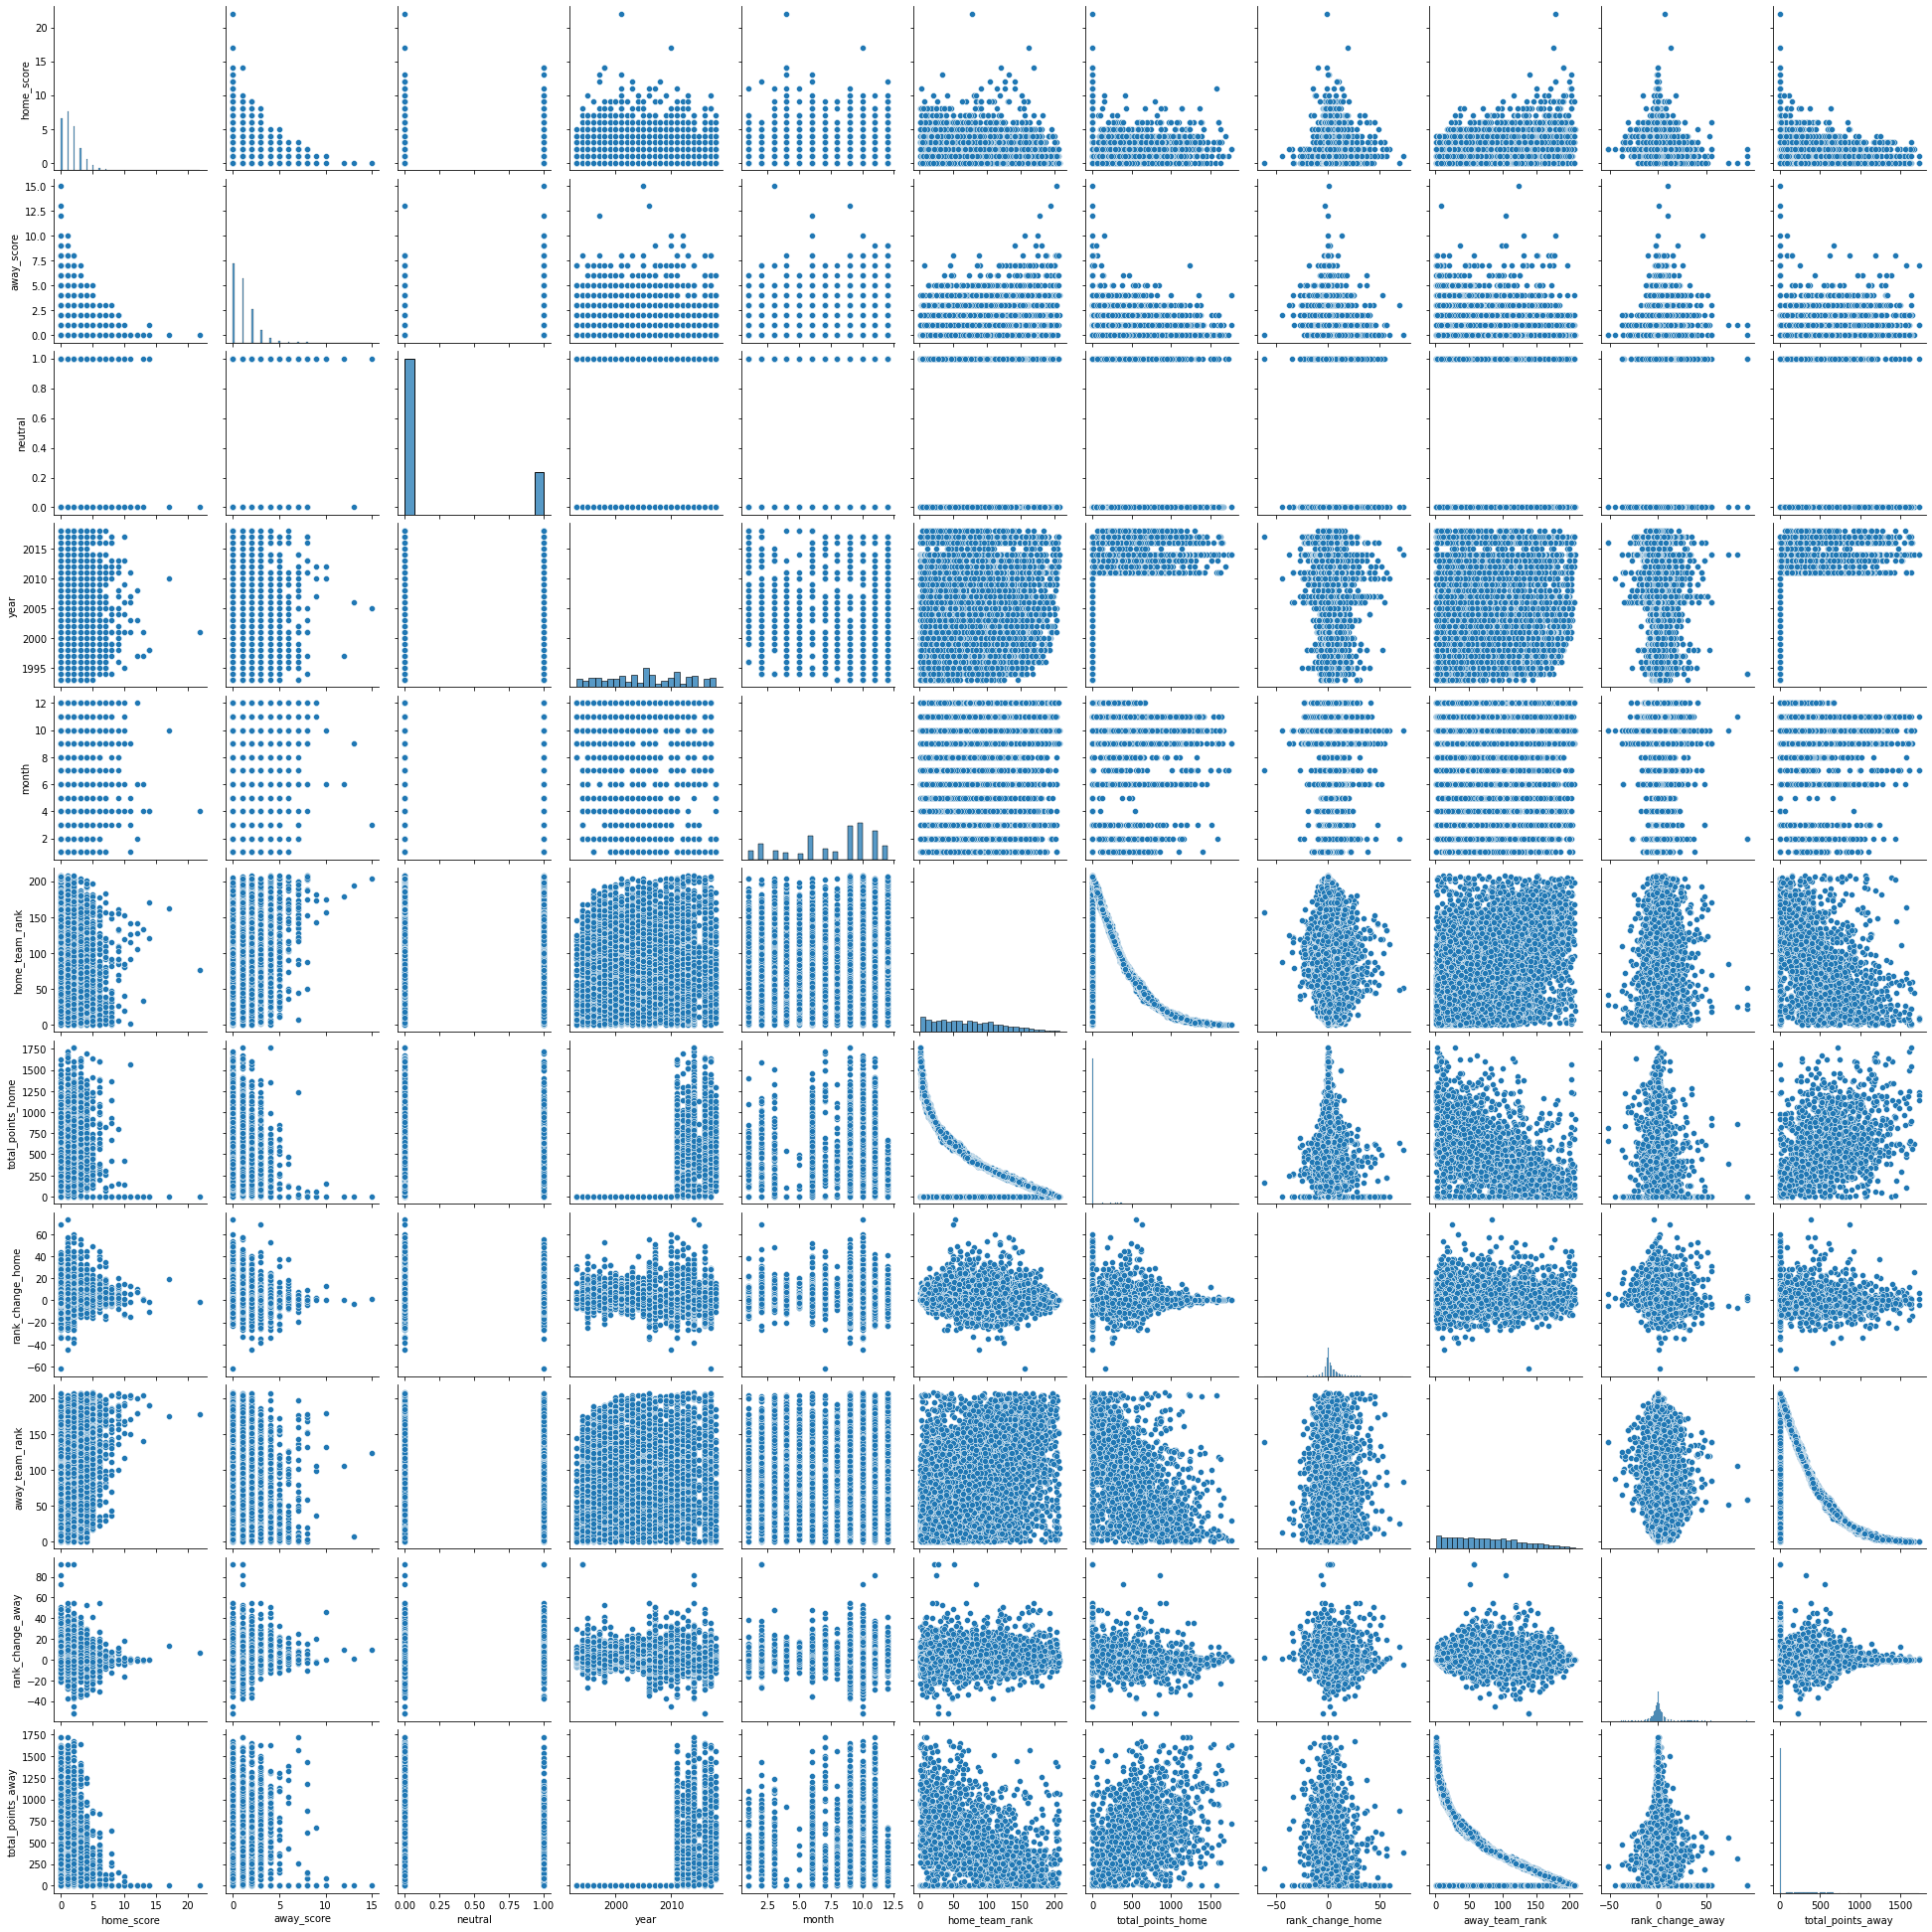

In [ ]:
sns.pairplot(results_rank)
plt.show()

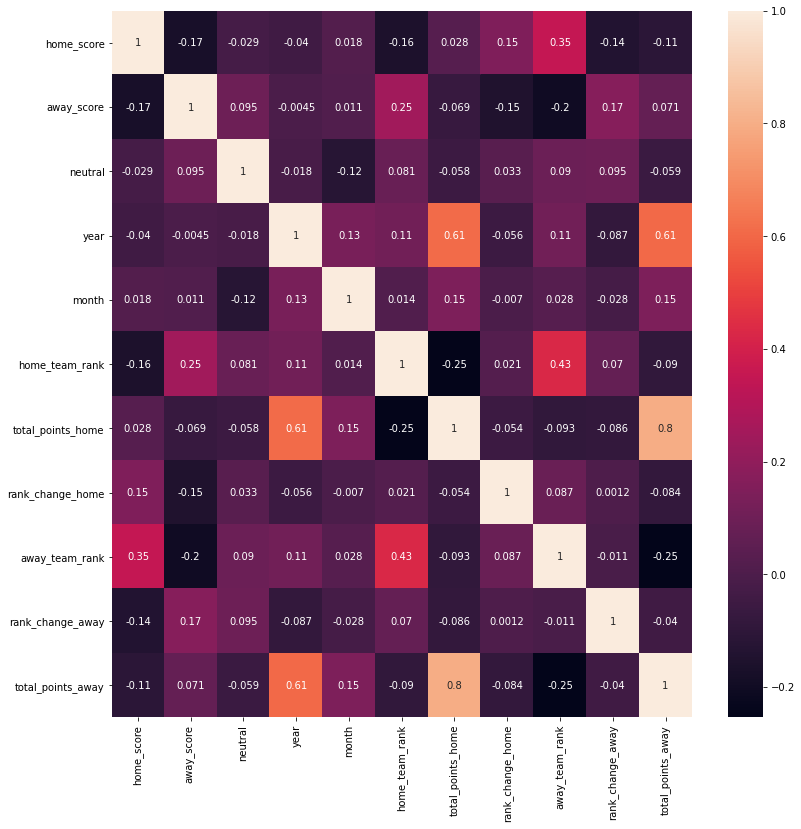

In [ ]:

plt.subplots(figsize=(13,13))
sns.heatmap(results_rank.corr(),annot=True)

**Approach 1: Polynomial approach**

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

In [ ]:
#Import libaries
import datetime
import operator
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import Markdown as md
from datetime import date, timedelta, datetime
from numpy import sqrt
from pandas import read_csv, to_datetime
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [ ]:
results_rank.head(3)

,home_score,tournament,home_team_rank,rank_change_home
0,0,FIFA World Cup qualification,19,16
1,0,FIFA World Cup qualification,70,8
2,0,FIFA World Cup qualification,22,-6


In [ ]:
to_drop = ['date_x','home_team','away_team','country_x','year','month','total_points_home','confederation','total_points_away']

In [ ]:
results_rank

,home_score,tournament,home_team_rank,rank_change_home
0,0,25,18,49
1,0,25,69,41
2,0,25,21,27
3,1,25,93,64
4,0,25,57,26
...,...,...,...,...
8195,3,26,116,33
8196,1,26,125,40
8197,0,30,122,31
8198,1,26,52,28


In [ ]:
#import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
results_rank['tournament'] = le.fit_transform(results_rank['tournament'])


In [ ]:
results_rank.tail()

,home_score,tournament,home_team_rank,rank_change_home
8195,3,26,116,33
8196,1,26,125,40
8197,0,30,122,31
8198,1,26,52,28
8199,1,26,77,34


In [ ]:
X = results_rank.iloc[:,1:4]

In [ ]:
#describe the dataset
X = results_rank.iloc[:,1:4].values
y = results_rank.iloc[:,0].values

In [ ]:
#spliting the data for training
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .20, random_state = 40)
regr = LinearRegression()
regr.fit(X_train, Y_train)
#regr = linear_model.LinearRegression() 
#regr.fit(X_train, Y_train)
#predicting from our trained data set
predicted = regr.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted})
df

,Actual,Predicted
0,3,1.334238
1,3,1.941522
2,4,1.859916
3,1,1.674900
4,3,1.841595
...,...,...
1635,1,1.965349
1636,2,1.691115
1637,0,1.267821
1638,5,1.801292


In [ ]:
#coefficient of  the trainig dataset
from sklearn.metrics import r2_score
r2_score(Y_test,predicted)

0.04038794009525859

The coeffiecient of determination of the model appears to be low , which is unusual.

Importing the necessary libraries and fitting the polynomial model we then have

In [ ]:

poly_reg = PolynomialFeatures(degree=3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
y_pred = pol_reg.predict(X_poly)
y_pred

array([2.27930305, 1.81909248, 1.53670069, ..., 1.30202121, 1.31150141,
       1.49327004])

In [ ]:
pol_reg.coef_

array([ 0.00000000e+00, -1.32620961e-01, -1.78180660e-02, -3.44224946e-02,
        3.53640120e-03,  8.94548467e-05,  1.76948004e-03,  1.20812477e-04,
        6.70225843e-05,  1.60914810e-03, -2.85080208e-05, -5.11255460e-06,
       -1.67831586e-05,  2.43990599e-06, -7.39954000e-06, -2.07318829e-06,
       -5.17615944e-07, -7.22572106e-07,  4.80164200e-06, -2.01825208e-05])

In [ ]:
poly_pred = pol_reg.predict(poly_reg.fit_transform([[1,2,30]]))
print('Goals Scored by the Home Team: %d' %poly_pred)

Goals Scored by the Home Team: 2


In [ ]:

#Evaluating our algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 1.1304025715494852
Mean Squared Error: 2.367610053775795
Root Mean Squared Error: 1.5387040175991595


The RMSE is very high meaning we need more data for our analysis and the predictions are not accurate.
Checking the residuals for the model

In [ ]:
residuals = np.subtract(y_pred, y)

pd.DataFrame(residuals).describe()

residuals.mean()

-2.0046295247073254e-16

Testing for Heteroskedasticity using the Barlett test our null hypothesis is that the data has equal variance and thus given that the critical value which can be seen to be tending to infinity(lol) is greater than the test statistic we fail to reject the null hypothesis of equal variance and conclude that the model is Homoscedastic.

**Logistic Regression**

In order to carry out Logistic Regression I first wrote a function that I applied on the home_score and the away_score columns.

The function characterized whether a game was Won ,lost or Drawn by either of the teams.

Win was 'W'
Lost was 'L'
Draw was 'D'

In [ ]:
def goals(score):
    home_score = score[0]
    away_score = score[1]
  
    if home_score > away_score:
        return 'W'
    elif home_score == away_score:
        return 'D'
    else:
        return 'L'
    return home_score

In [ ]:
results_rank['home_scores'] = results_rank[['home_score', 'away_score']].apply(goals, axis=1)

In [ ]:
def goals(score):
    home_score = score[0]
    away_score = score[1]
  
    if home_score > away_score:
        return 'L'
    elif home_score == away_score:
        return 'D'
    else:
        return 'W'
    return home_score

In [ ]:
results_rank['away_scores'] = results_rank[['home_score', 'away_score']].apply(goals, axis=1)

In [ ]:
#import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
results_rank['home_scores'] = le.fit_transform(results_rank['home_scores'])
results_rank['away_scores'] = le.fit_transform(results_rank['away_scores'])

In [ ]:
results_rank.head(3)
# df.drop(columns =['C', 'D'])

,date_x,home_team,away_team,home_score,away_score,tournament,country_x,neutral,year,month,home_team_rank,total_points_home,rank_change_home,confederation,away_team_rank,rank_change_away,total_points_away,home_scores,away_scores
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19,0.0,16,CONMEBOL,67,1,0.0,0,0
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70,0.0,8,CONMEBOL,5,5,0.0,1,2
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,1993,8,22,0.0,-6,CONMEBOL,35,30,0.0,0,0


In [ ]:
rank2=results_rank.drop(columns= ['date_x','home_team','away_team','country_x','year','month','total_points_home','confederation'])

In [ ]:
#splitting the dataset
X = rank2.drop(['home_scores','away_scores','home_score','away_score','neutral','total_points_away','tournament'],axis=1)
y = rank2["home_scores"]

In [ ]:
results_rank['home_scores'].value_counts()

2    4035
1    2265
0    1900
Name: home_scores, dtype: int64

In [ ]:
X.head()

,home_team_rank,rank_change_home,away_team_rank,rank_change_away
0,19,16,67,1
1,70,8,5,5
2,22,-6,35,30
3,94,31,8,-5
4,58,-7,25,7


In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: home_scores, dtype: int64

In [ ]:
#fitting the logistic regression model
#training the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=40)
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(max_iter=300)
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogReg.score(X,y)

0.645

In [ ]:
#using our model to make predictions
y_pred = LogReg.predict(X_test)

In [ ]:
#evaluate the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 14, 140, 245],
       [ 20, 313, 121],
       [ 12,  70, 705]])

The model predicts the right outcome 17,316 and 686 times.

Thus the model can predict whether a game will be won by the home team 686 out of the test set.

This model can be improved by carrying out hyperparameter tuning and finding the best hyperparameters for the model.

Carrying out a Grid Search in order to find the Hyperparameters of the Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
 define models and parameters
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear','saga']
penalty = ['l2','l1']
c_values = [1.0, 0.1, 0.01,0.001,0.0025,0.003,0.005]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.637059 using {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}